In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
def gradient_descent(m_now:float,b_now:float,points:pd.DataFrame,L:float,x_label:str,y_label:str):
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i][x_label]
        y = points.iloc[i][y_label]

        m_gradient = -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient = -(2/n) * (y - (m_now * x + b_now))
        
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    print("M,B",m,b)
    return m,b

In [18]:
m = 0
b = 0
L = 0.0001
epochs = 450
df = pd.read_csv("Housing.csv")

for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch {i}")
    m,b = gradient_descent(m,b,df,L,"area","price")
    
print(m,b)

Epoch 0
M,B 2472.477064220184 0.6422018348623855
M,B -8503.961011699357 -2.2088210419998324
M,B 40225.385997428995 10.448152207124412
M,B -176106.10911166362 -45.74184652251003
M,B 784286.7270034716 203.71083818271987
M,B -3479329.161178432 -903.721860046346
M,B 15448780.002453305 4012.6701305073516
M,B -68581612.48750785 -17813.405840911128
M,B 304467105.74283993 79082.36512801037
M,B -1351663992.180225 -351081.55641044804
M,B 6000647058.555695 1558609.6255988819
M,B -26639569561.109943 -6919368.717171414
M,B 118265037116.54942 30718191.458844006
M,B -525031705704.58484 -136371871.6115805
M,B 2330851960194.65 605416093.557052
M,B -10347700518374.033 -2687714420.3568916
M,B 45938098119437.766 11931973537.516302
M,B -203939885479361.12 -52971398825.80809
M,B 905380905883741.2 235163871658.11456
M,B -4019393179560635.0 -1043998228457.3079
M,B 1.7843894682251268e+16 4634777839545.784
M,B -7.921707661006338e+16 -20575864054561.91
M,B 3.516802434889267e+17 91345517789331.61
M,B -1.561266824

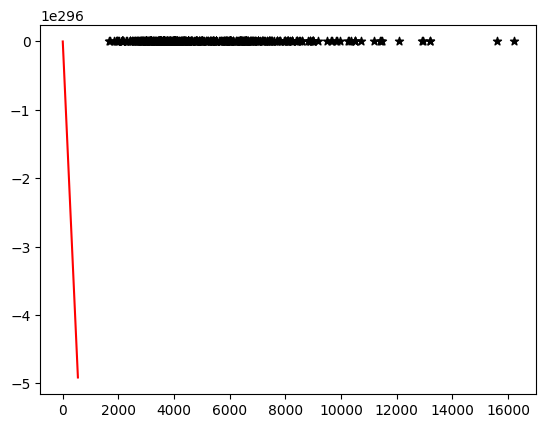

In [19]:
plt.scatter(df.area,df.price,color="black",marker="*")
plt.plot(list(range(len(df))),[m*x+b for x in range(len(df))],color="red")
plt.show()

In [21]:
import numpy as np

# Sample data
np.random.seed(42)
X = df["area"]
y = 4 + 3 * X + df["price"]

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None

    def fit(self, X, y):
        m = X.shape[0]  # Number of samples
        X_b = np.c_[np.ones((m, 1)), X]  # Add bias term (x0 = 1)
        self.theta = np.random.randn(2, 1)  # Initialize weights

        for epoch in range(self.epochs):
            gradients = 2/m * X_b.T.dot(X_b.dot(self.theta) - y)
            self.theta -= self.learning_rate * gradients

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        return X_b.dot(self.theta)

# Initialize and train the model
model = LinearRegression(learning_rate=0.1, epochs=1000)
model.fit(X, y)

# Output the learned parameters
print("Learned parameters:", model.theta)

# Make predictions
X_new = np.array([[0], [2]])
y_predict = model.predict(X_new)

print("Predictions:", y_predict)


ValueError: Data must be 1-dimensional, got ndarray of shape (545, 545) instead